In [1]:
# Author: Sam Green, Created: 07-02-22

#-------------------------------
# Libraries needed:
#-------------------------------
from pypion.ReadData import ReadData
from pypion.argparse_command import InputValues
#-------------------------------
#-------------------------------
import yt

import numpy as np
import math
#-------------------------------
# Astro stuff:
#-------------------------------
from astropy import units as u
#-------------------------------
#-------------------------------
# line = InputValues()
# time_dicts = line.time_dicts
# dimen = line.dimen


import os
import glob
import re

In [2]:

# print(dimen)

path = "/mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064/"
fluid_quantity = "Density"
tolerance = [-22, -27]
plane = "XY"


data_path = path
if os.path.exists(path):
    print(f"Chosen datapath: {path}")
else:
    print(f"Directory does not exist: {path}")
    exit()
    
########### Base name of SILO files ############################
filename=sorted(os.listdir(data_path))[2].replace('_level00_0000.00000000.silo','')
print(filename)

########### Define desired fluid quantity ######################
Quantity = fluid_quantity
print(f"Fluid quantity: {Quantity}")
Tolerance = tolerance
print(f"vmin: {Tolerance[0]} \nvmax: {Tolerance[1]}")

########### If 3D, specify the coordinate plane ################
surface_options = ['XY', 'XZ', 'YZ']
Surface = plane
if surface_options.count(Surface) > 0:
    print(f"Chosen surface: {Surface}")
else:
    print(f"Invalid Surface Choice: {Surface}")
    exit()


def make_snapshots(data_path, filename):
    ########## Cataloging silo files ###############################
    os.chdir(data_path)
    file_list = glob.glob('*.silo', recursive=True)
    level_list = []
    files = []

    for file in file_list:
        level = re.search('_level(.*)_', file)
        if level == None:
            pass
        else:
            level = level.group(1)
            if not level in level_list:
                level_list.append(level)
    level_list.sort()

    ########## Categorizing data files into levels #################
    if len(level_list) == 1: 
        print('Simulation Info: Single level')
        catalog = []
        files = sorted(glob.glob(filename + '_0000.*.silo'))
        catalog.append(files)
    else:
        print(f'Simulation Info: {len(level_list)} levels')
        catalog = []
        for i in range(len(level_list)):
            files = sorted(glob.glob(f"{filename}_level{level_list[i]}_0000.*.silo"))
            catalog.append(files)
            
    # Bundle silo files of different levels of same time instant into a snapshot.
    evolution = np.array(catalog).T
    print(f"Shape of evolution array: {evolution.shape}")
    return evolution

########### Make snapshots of the simulation ###################
evolution = make_snapshots(data_path, filename)

# print(evolution)

# ########### Find the dimensions of the simulation ##############
# find_dimensions()

# ########### Create image directory #############################
# ImageDir = create_image_dir(image_dir, filename, Quantity, Surface)

# ######### Defining default fps for mp4 ##########
# fps=10

Chosen datapath: /mnt/massive-stars/data/thomas_simulations/wr140-sims/covertex_start/orig_res/wr140-hydro-cool-n064/
WR140_hydro_cool_d3l6n064
Fluid quantity: Density
vmin: -22 
vmax: -27
Chosen surface: XY
Simulation Info: 6 levels
Shape of evolution array: (423, 6)


In [28]:
# ########### Loop through snapshots #############################
ds_list = []

for i in range(3):
    data = ReadData(evolution[i])
    sim_time = data.sim_time()

    arr = np.array(evolution[i])
    data_den = ReadData(arr).get_3Darray("Density")['data']

    grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(dims), right_edge=[0.5+0.5**(n+1)]*len(dims), level=n, dimensions=dims) for n in range(N_level)]


    i = 0
    for g in grid_data:
        g[("gas", "density")] = (data_den[i], "g/cm**3")
        i += 1


    ds = yt.load_amr_grids(grid_data, [128, 128, 128], length_unit="1e15 * cm", geometry=("cartesian", ("z","y","x")),sim_time=sim_time)
    ds_list.append(ds)  

ts = yt.DatasetSeries(ds_list)

yt : [INFO     ] 2022-10-26 17:03:19,219 Parameters: current_time              = 0.0 s
yt : [INFO     ] 2022-10-26 17:03:19,221 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-10-26 17:03:19,223 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-10-26 17:03:19,225 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-10-26 17:03:19,226 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-10-26 17:03:19,389 Parameters: current_time              = 44.62492578395574 s
yt : [INFO     ] 2022-10-26 17:03:19,392 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-10-26 17:03:19,394 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-10-26 17:03:19,395 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-10-26 17:03:19,397 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-10-26 17:03:22,031 Parameters: current_time              = 81973.4

In [30]:
# for ds in ts:
#     slc = yt.SlicePlot(ds, "z", "density", center=('c'),).annotate_grids()
#     # slc.set_cmap("density", "viridis")
#     # slc.annotate_timestamp(corner="upper_left", redshift=False, draw_inset_box=True)
#     slc.show()
    

In [5]:
data = ReadData(evolution[100])
N_level = data.nlevels()
N_grids = data.ngrid()
sim_time = data.sim_time()
domain_size = data.dom_size()

baseline_data = data.get_3Darray(Quantity)
fluid_parameter = baseline_data['data']

print(N_grids, N_level, domain_size, sim_time)

dims = N_grids 

[64, 64, 64] 6 {'DomSize': [16, 32, 32], 'Ndom': [4, 2, 2]} 24226745.988659706 s


In [ ]:
# arr = np.array(evolution[100])
# data_den = np.swapaxes(np.array(ReadData(arr).get_3Darray("Density")['data']), 1, 3)
# data_pressure = np.swapaxes(np.array(ReadData(arr).get_3Darray("Pressure")['data']), 1, 3)
# data_temp = np.swapaxes(np.array(ReadData(arr).get_3Darray("Temperature")['data']), 1, 3)
# data_vel = ReadData(arr).get_3Darray("VelocityX")['data']
# data_ngmask = ReadData(arr).get_3Darray("NG_Mask")['data']

In [241]:
arr = np.array(evolution[100])
data_den = ReadData(arr).get_3Darray("Density")['data']
data_temp = ReadData(arr).get_3Darray("Temperature")['data']
data_velx = ReadData(arr).get_3Darray("VelocityX")['data']
data_vely = ReadData(arr).get_3Darray("VelocityY")['data']
data_velz = ReadData(arr).get_3Darray("VelocityZ")['data']
data_ngmask = ReadData(arr).get_3Darray("NG_Mask")['data']



In [242]:
# den_arr = np.array(data_den)
# den_arr_test = np.swapaxes(den_arr, 1, 3)
# den_arr_test.shape

In [243]:

# print(data_den)

grid_data = [dict(left_edge=[0.5-0.5**(n+1)]*len(dims), right_edge=[0.5+0.5**(n+1)]*len(dims), level=n, dimensions=dims) for n in range(N_level)]


i = 0
for g in grid_data:
    g[("gas", "density")] = (data_den[i], "g/cm**3")
    g[("gas", "temperature")] = (data_temp[i], "K")
    g[("gas", "velocity_x")] = (data_velx[i], "cm/s")
    g[("gas", "velocity_y")] = (data_vely[i], "cm/s")
    g[("gas", "velocity_z")] = (data_velz[i], "cm/s")
    # g[("gas", "pressure")] = (data_pressure[i], "g/cm**3")
    i += 1

type(grid_data)

# ds = yt.load_amr_grids(grid_data, [128, 128, 128], length_unit="7e14 * cm", refine_by=1024)

# ds.index.num_grids, ds.index.grid_dimensions

ds = yt.load_amr_grids(grid_data, [128, 128, 128], length_unit="1e15 * cm", geometry=("cartesian", ("z","y","x")),sim_time=sim_time)  # Need to arbitrarily set the length unit to width of domain

yt : [INFO     ] 2022-10-26 12:34:29,585 Parameters: current_time              = 24226745.988659706 s
yt : [INFO     ] 2022-10-26 12:34:29,587 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2022-10-26 12:34:29,589 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-10-26 12:34:29,591 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-10-26 12:34:29,592 Parameters: cosmological_simulation   = 0


In [244]:
ds.domain_width.in_units("cm")

unyt_array([1.e+15, 1.e+15, 1.e+15], 'cm')

yt : [INFO     ] 2022-10-26 12:56:31,765 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-26 12:56:31,767 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-26 12:56:31,768 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-10-26 12:56:31,769 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-10-26 12:56:31,773 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



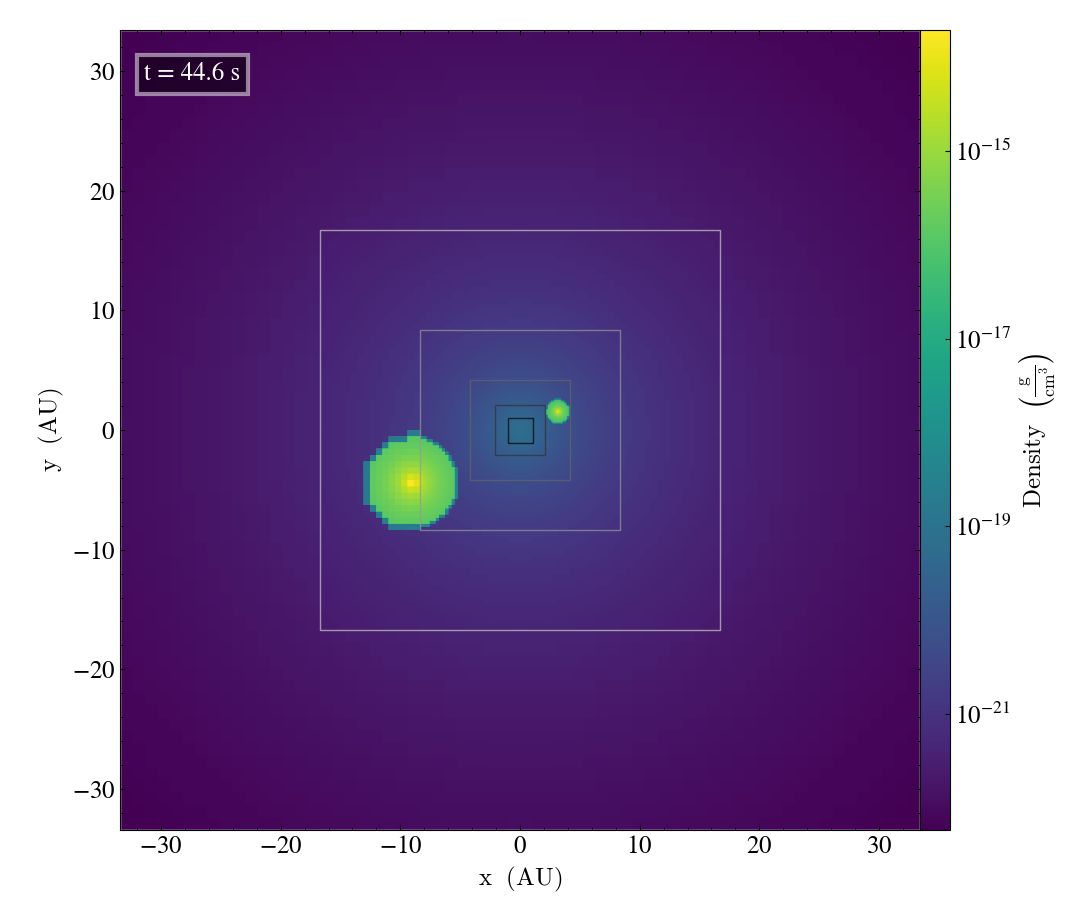

In [269]:
slc = yt.SlicePlot(ds, "z", "density", center=('c'),).annotate_grids()
slc.set_cmap("density", "viridis")
# slc.zoom(8)
# slc.set_width((1.0, 'cm'))
# slc.annotate_velocity(normalize=False)
# slc.annotate_streamlines("velocity_x", "velocity_y", factor=1, density=1, color="white")
# slc.annotate_contour("temperature", levels=10, clim=(1e6, 1e8), plot_args={"colors":"white"})
# slc.annotate_cell_edges(line_width=0.0005, alpha=0.5)

slc.annotate_timestamp(corner="upper_left", redshift=False, draw_inset_box=True)
slc.show()

In [221]:
ds.unit_system['density']

g/cm**3

In [222]:
# prj = yt.ProjectionPlot(
#     ds,
#     "x",
#     ("gas", "density"),
#     weight_field=("gas", "temperature"),
#     # buff_size=(1000, 1000),
#     center=([0.5,0.5,0.5]),
#     width=[1,1,1]
# )

In [223]:
# prj.show()

In [224]:
# image = yt.off_axis_projection(ds, [0.5, 0.5, 0.5], item="density", width=[1,1,1], method="integrate", resolution=600, normal_vector=[1,0,0])

# image.shape

# yt.write_projection(image, '/mnt/local/thomas/yt_test.png')

yt : [INFO     ] 2022-10-26 12:22:25,987 xlim = -0.500000 0.500000
yt : [INFO     ] 2022-10-26 12:22:25,989 ylim = -0.500000 0.500000
yt : [INFO     ] 2022-10-26 12:22:25,990 zlim = -0.500000 0.500000
yt : [INFO     ] 2022-10-26 12:22:25,991 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



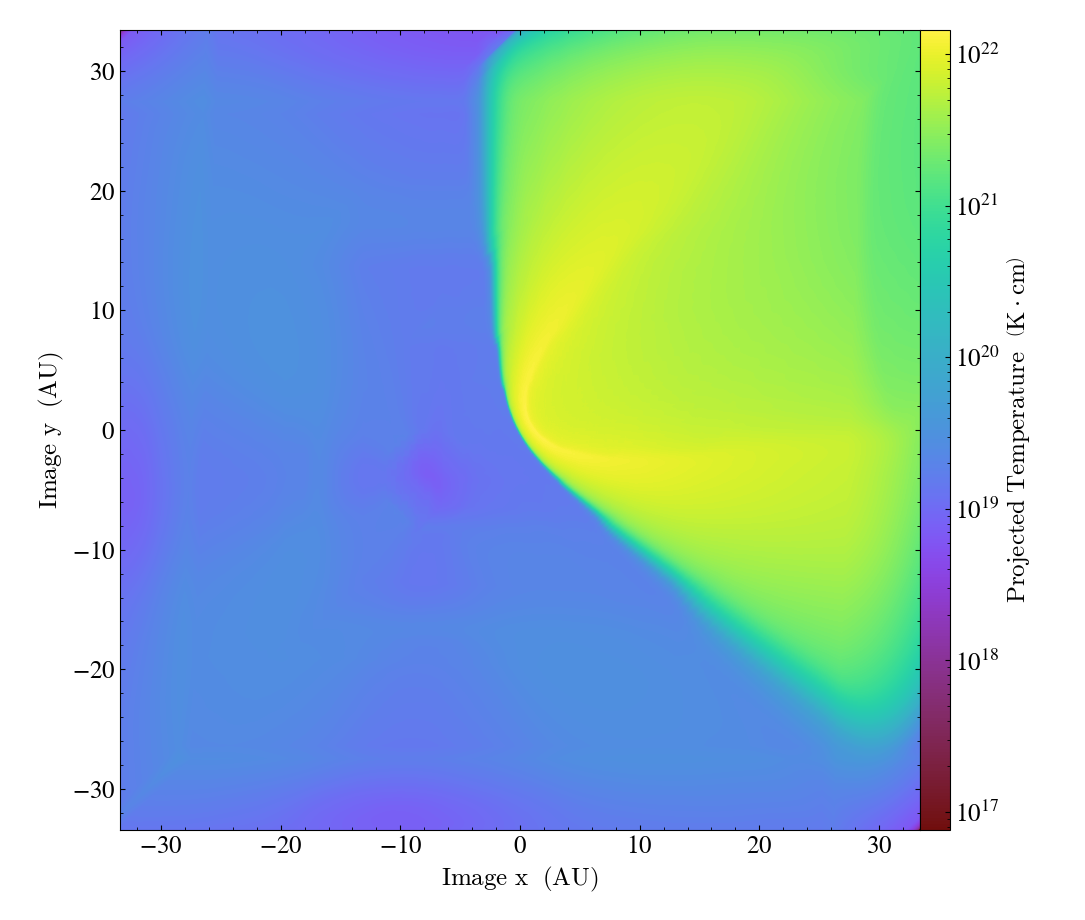

In [227]:
prj = yt.OffAxisProjectionPlot(ds, 
                                center=[0.5, 0.5, 0.5], 
                                fields="temperature", width=[1,1,1], 
                                method="integrate", normal=[-1,0.2,0.2], 
                                north_vector=[0,1,0],
                                # buff_size=(2000,2000)
                                )

# prj.set_cmap("temperature", "kamae")
# prj.set_zlim("temperature", 1e20, 1e21)
prj.show()


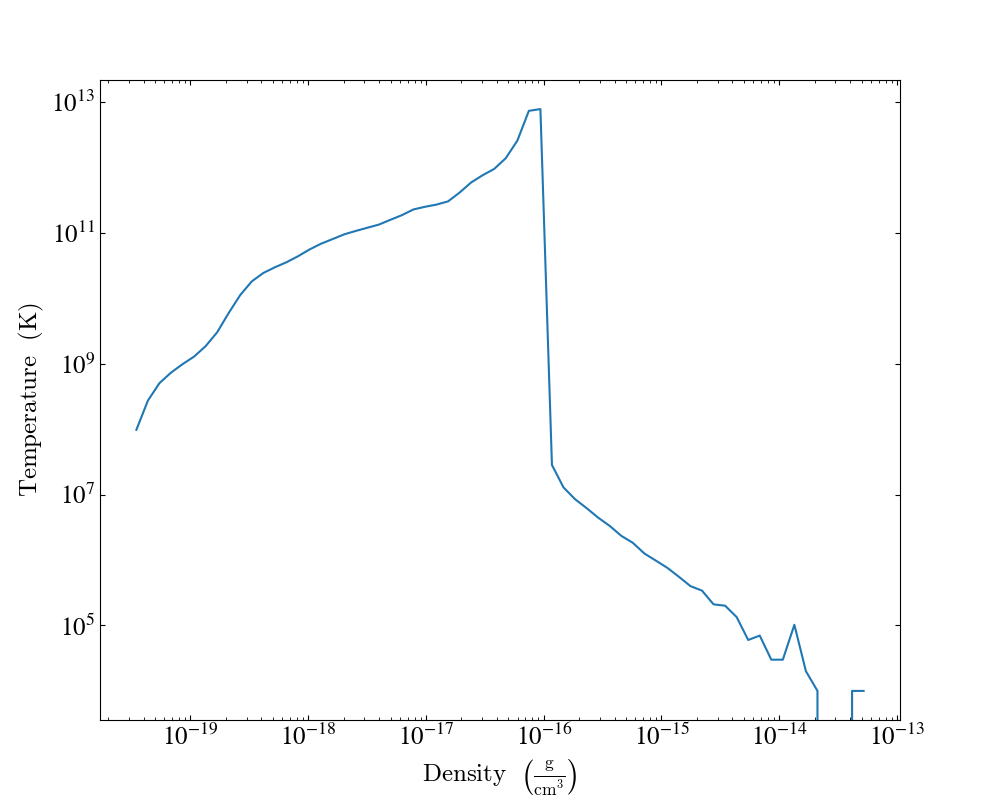

In [228]:
ad = ds.all_data()
plot = yt.ProfilePlot(ad, "density", "temperature", weight_field=None)
plot.show()

In [103]:
# sc = yt.create_scene(ds, field=("gas", "density"))

# source = sc[0]
# source.set_field(("gas", "density"))
# source.set_log(True)


# bounds = (1e-19,1e-14)
# tf = yt.ColorTransferFunction(x_bounds=bounds)
# tf.add_gaussian(location=0.15, width=5, height=[0.5,1,1,0.05])
# tf.show()

In [233]:
# yt.ProjectionPlot(ds, "x", "temperature", method="integrate", weight_field='density').show()

yt : [INFO     ] 2022-10-26 12:34:48,614 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 12:34:48,616 Creating volume
yt : [INFO     ] 2022-10-26 12:34:48,820 Creating transfer function
yt : [INFO     ] 2022-10-26 12:34:48,822 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.


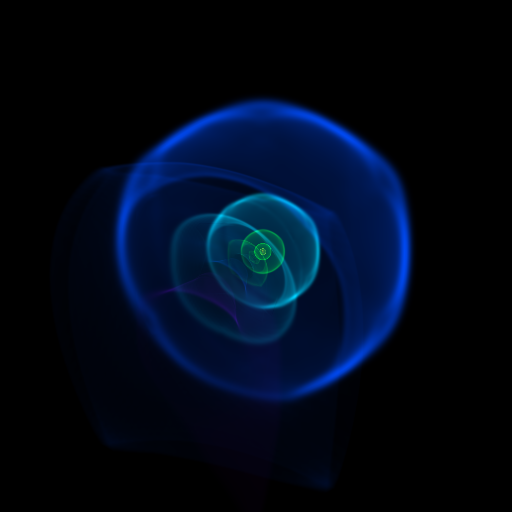

In [246]:
sc = yt.create_scene(ds, "density", lens_type='plane-parallel')
sc.show()

yt : [WARNING  ] 2022-10-26 12:36:32,285 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-10-26 12:36:32,286 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 12:36:32,295 Creating volume
yt : [INFO     ] 2022-10-26 12:36:33,763 Saving rendered image to /mnt/local/thomas/volume.png
yt : [INFO     ] 2022-10-26 12:36:34,114 Rendering scene (Can take a while).


ImageArray([[[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            ...,

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.]],

            [[0., 0., 0., 1.],
             [0., 0., 0., 1.],
             [0., 0., 0., 1.],
             ...,
             [0., 0., 0., 1.],
             [0.

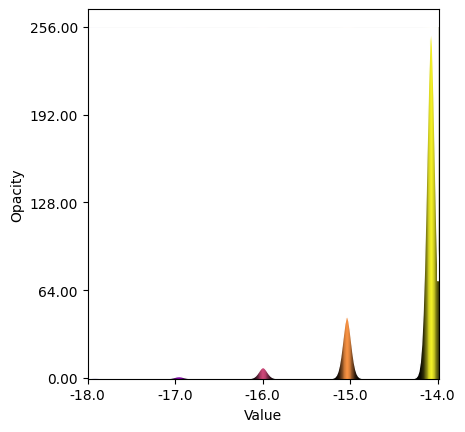

In [248]:
source = sc[0]
source.set_field(("gas", "density"))
source.set_log(True)
bounds = (1e-18,1e-14)

tf= yt.ColorTransferFunction(np.log10(bounds))



# def linramp(vals, minval, maxval):
#         return (vals - vals.min()) / (vals.max() - vals.min())


# tf.map_to_colormap(
#     np.log10(1e-19), np.log10(1e-14), colormap="plasma", scale_func=linramp
# )

# tf.add_gaussian(location=-16, width=0.005, height=[1,0,0,0.0025])
# tf.add_gaussian(location=-15, width=0.005, height=[0.5,1,1,0.04])

tf.add_layers(5, w=0.005, colormap="plasma")

tf.show()

source.tfh.tf = tf
source.tfh.bounds = bounds
source.tfh.plot("/mnt/local/thomas/transfer_function.png", profile_field="density")

sc.save("/mnt/local/thomas/volume.png", sigma_clip=4.0)

cam = sc.camera
cam.resolution = (1024, 1024)
# cam.position = ds.domain_center + np.array([0.0, 0.0, 0.0])
# cam.focus = ds.domain_center
cam.north_vector = [0, 1, 0]
cam.switch_orientation(normal_vector=[1, 0, 0], north_vector=[0, 1, 0])
# cam.zoom(1.0)
sc.render()
# for i in cam.iter_rotate(np.pi, 5):
#     im = sc.render()
#     sc.save("/mnt/local/thomas/yt_images/rotation_dens2%04i.png" % (i+1), sigma_clip=4.0)


In [237]:
im, sc = yt.volume_render(ds, "temperature")
cam = sc.camera
for i in cam.iter_rotate(np.pi, 30):
    im = sc.render()
    sc.save("/mnt/local/thomas/yt_images/wr140_temp/rotation_temp%04i.png" % (i+1))

yt : [INFO     ] 2022-10-26 09:04:44,120 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 09:04:44,123 Creating volume
yt : [INFO     ] 2022-10-26 09:04:44,303 Creating transfer function
yt : [INFO     ] 2022-10-26 09:04:44,304 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2022-10-26 09:04:45,496 Found previously rendered image to save.
yt : [INFO     ] 2022-10-26 09:04:45,497 Saving rendered image to AMRGridData_Render_temperature.png
yt : [INFO     ] 2022-10-26 09:04:45,605 Rendering scene (Can take a while).
yt : [WARNING  ] 2022-10-26 09:04:46,740 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2022-10-26 09:04:46,743 Rendering scene (Can take a while).
yt : [INFO     ] 2022-10-26 09:04:47,888 Saving rendered image to /mnt/local/thomas/yt_images/wr140_temp/rotation_temp0001.png
yt : [INFO     ] 2022-10-26 0

In [238]:
# for i in cam.iter_zoom(1.5, 10):
#     # sc.render()
#     sc.save(f"/mnt/local/thomas/rotate_{i:04d}.png")

In [215]:
# source = sc[0]
# source.set_field("density")
# source.set_log(True)



In [216]:
# bounds = (1e-13,1e-9)
# tf = yt.ColorTransferFunction(x_bounds=np.log10(bounds))

# # tf.add_gaussian(location=-15, width=0.003, height=[1,0,0,0.05]) 
# # tf.add_gaussian(location=-14,width=0.005,height=[0.5,1,1,0.05])

# tf.add_layers(N=3, colormap='arbre')

# print(tf)


In [217]:
# source.tfh.tf = tf
# source.tfh.bounds = bounds
# source.tfh.plot('transferFunction.png', profile_field="density")

In [218]:
# tf.show()

In [219]:
# sc.show()